# DSCI100 Project: Pulsar Star Prediction and Analysis

## Introduction

background

Question

Dataset:
The dataset we will use is the description of sample pulsar candidates collected during High Time Resolution Universe (HTRU) survey. In the dataset, each row represents a single candidate, which contains overall 17897 candidates. The variables in dataset are summarized below:
1. mean_pf: Mean of the integrated profile.

2. sd_pf: Standard deviation of the integrated profile.

3. exk_pf: Excess kurtosis of the integrated profile.

4. skew_pf: Skewness of the integrated profile.

5. mean_ds: Mean of the DM-SNR curve.

6. sd_ds: Standard deviation of the DM-SNR curve.

7. exk_ds: Excess kurtosis of the DM-SNR curve.

8. skew_ds: Skewness of the DM-SNR curve.

9. Class

For Class variable, we labeled every candidate as 1 (positive) and 0 (negative). 

## Methods & Results

1.load R package.

In [20]:
library(tidyverse)
library(repr)
library(tidymodels)
library(ggplot2)
library(repr)
library(GGally)
library(broom)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



1.load and read the raw dataset by URL. Since the raw data doesn't have name on each variable, we need to identify a name for each vavriable by colnames function

In [19]:
url<-"https://raw.githubusercontent.com/LawrenceZzf/DSCI100-G63-Proj1/main/HTRU_2.csv"
HTRU_data<-read_csv(url,col_names=FALSE)
colnames(HTRU_data)=c("mean_pf",
                 "sd_pf",
                 "exk_pf",
                 "skew_pf",
                 "mean_ds",
                 "sd_ds",
                 "exk_ds",
                 "skew_ds",
                 "class")
head(HTRU_data)

Rows: 17898 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): X1, X2, X3, X4, X5, X6, X7, X8, X9

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


mean_pf,sd_pf,exk_pf,skew_pf,mean_ds,sd_ds,exk_ds,skew_ds,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
140.56250,55.68378,-0.23457141,-0.6996484,3.199833,19.11043,7.975532,74.24222,0
102.50781,58.88243,0.46531815,-0.5150879,1.677258,14.86015,10.576487,127.39358,0
103.01562,39.34165,0.32332837,1.0511644,3.121237,21.74467,7.735822,63.17191,0
136.75000,57.17845,-0.06841464,-0.6362384,3.642977,20.95928,6.896499,53.59366,0
88.72656,40.67223,0.60086608,1.1234917,1.178930,11.46872,14.269573,252.56731,0
93.57031,46.69811,0.53190485,0.4167211,1.636288,14.54507,10.621748,131.39400,0


### Cluster: Predictor Selection

cluster introduction

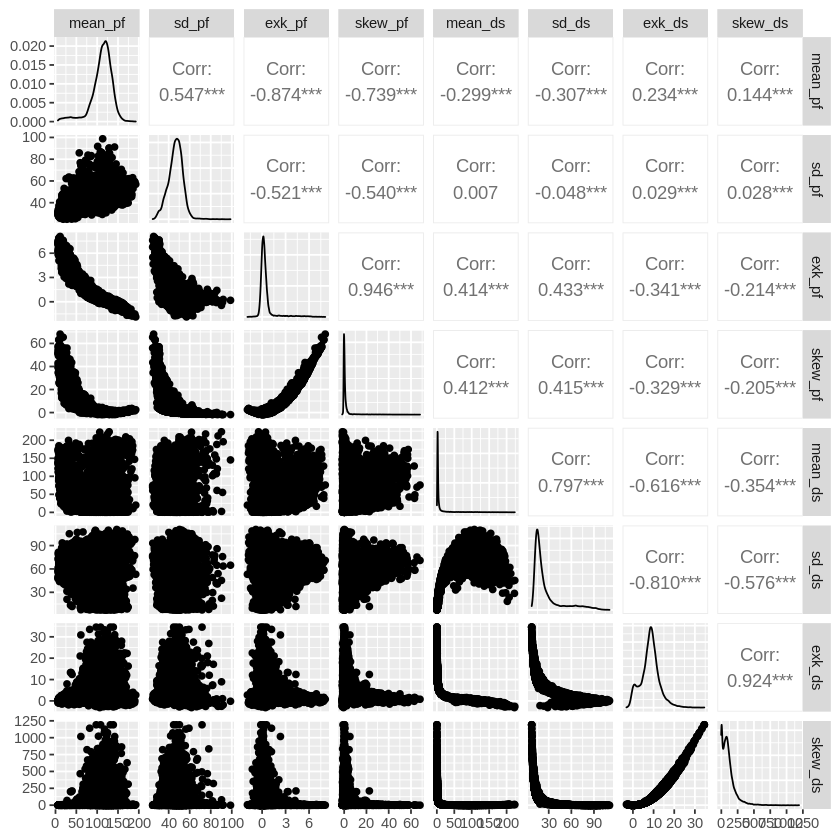

In [30]:
HTRU_data1<-HTRU_data|>
    select(-class)
HTRU_pairs_plot<-ggpairs(HTRU_data1,columns=1:8)
HTRU_pairs_plot

In [31]:
scaled_HTRU<-HTRU_data1|>
    mutate(across(everything(),scale))

In [44]:
ks<-tibble(k=seq(from=1,to=10,by=1))
set.seed(2025)
HTRU_stats<- ks |>
     rowwise() |>
     mutate(clusts = list(kmeans(scaled_HTRU, nstart=100,center=k)))|>
     mutate(glanced=list(glance(clusts)))|>
     select(-clusts)|>
     unnest(glanced)
HTRU_stats

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 894900)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 894900)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 894900)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 894900)”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 894900)”
Warning message:
“did not converge in 10 iterations”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 894900)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 894900)”
Warning message:
“did not converge in 10 iterations”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 894900)”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in

k,totss,tot.withinss,betweenss,iter
<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,143176,143176.00,-4.307367e-09,1
2,143176,92209.22,5.096678e+04,1
3,143176,68068.18,7.510782e+04,4
4,143176,53117.85,9.005815e+04,5
5,143176,44216.54,9.895946e+04,5
6,143176,39131.05,1.040450e+05,4
7,143176,34349.87,1.088261e+05,7
8,143176,31188.33,1.119877e+05,6
9,143176,29186.67,1.139893e+05,5


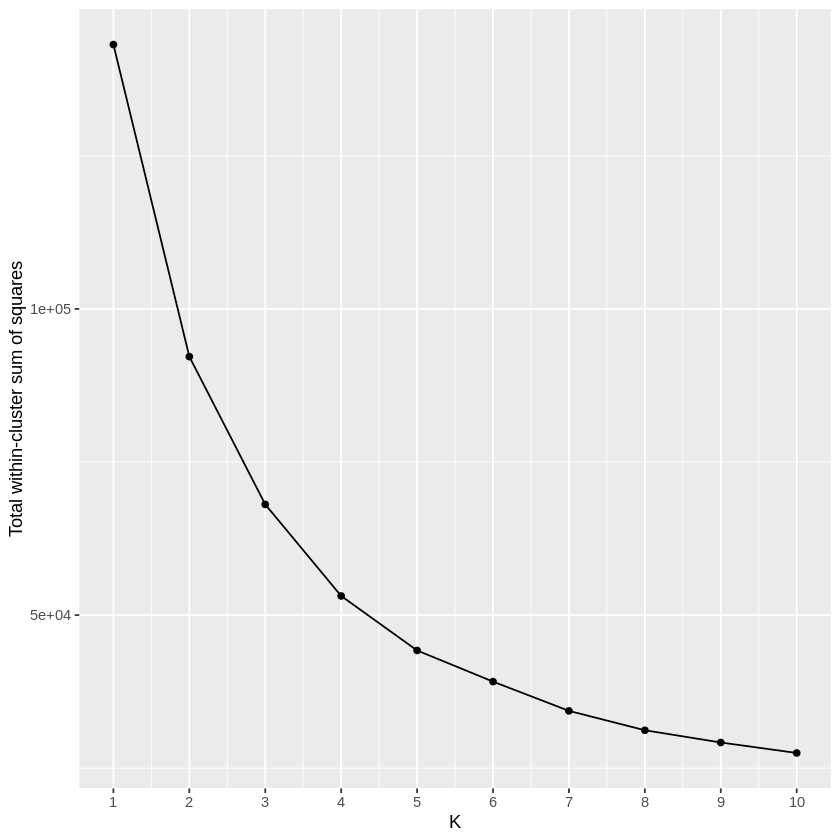

In [45]:
HTRU_k_plot<-ggplot(HTRU_stats,aes(x=k,y=tot.withinss))+
    geom_point()+
    geom_line()+
    labs(x="K",y="Total within-cluster sum of squares")+
    scale_x_continuous(breaks = 1:10) 
HTRU_k_plot

We choose k=3, because increasing k further only decreased the total within-cluster sum of squares a small amount, which means 3 is a effective k value for clustering

In [83]:
set.seed(2024)
HTRU_cluster<-kmeans(scaled_HTRU,center=2,nstart=100)|>
    augment(scaled_HTRU)
head(HTRU_cluster)

mean_pf,sd_pf,exk_pf,skew_pf,mean_ds,sd_ds,exk_ds,skew_ds,.cluster
"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<fct>
1.1492849,1.33479435,-0.66955083,-0.4004478,-0.3194313,-0.3706151,-0.07279575,-0.2874301,2
-0.3341589,1.80221498,-0.01178443,-0.3705251,-0.3710915,-0.5889076,0.50441285,0.2115755,2
-0.3143634,-1.05329280,-0.14522850,-0.1165896,-0.3220980,-0.2353216,-0.12599257,-0.3913625,2
1.0006664,1.55321102,-0.51339427,-0.3901672,-0.3043957,-0.2756588,-0.31225666,-0.4812869,2
-0.8713781,-0.85885481,0.11560548,-0.1048632,-0.3879995,-0.7630898,1.32398915,1.3867553,2
-0.6825595,0.02171238,0.05079471,-0.2194515,-0.3724816,-0.6050896,0.51445740,0.2491331,2


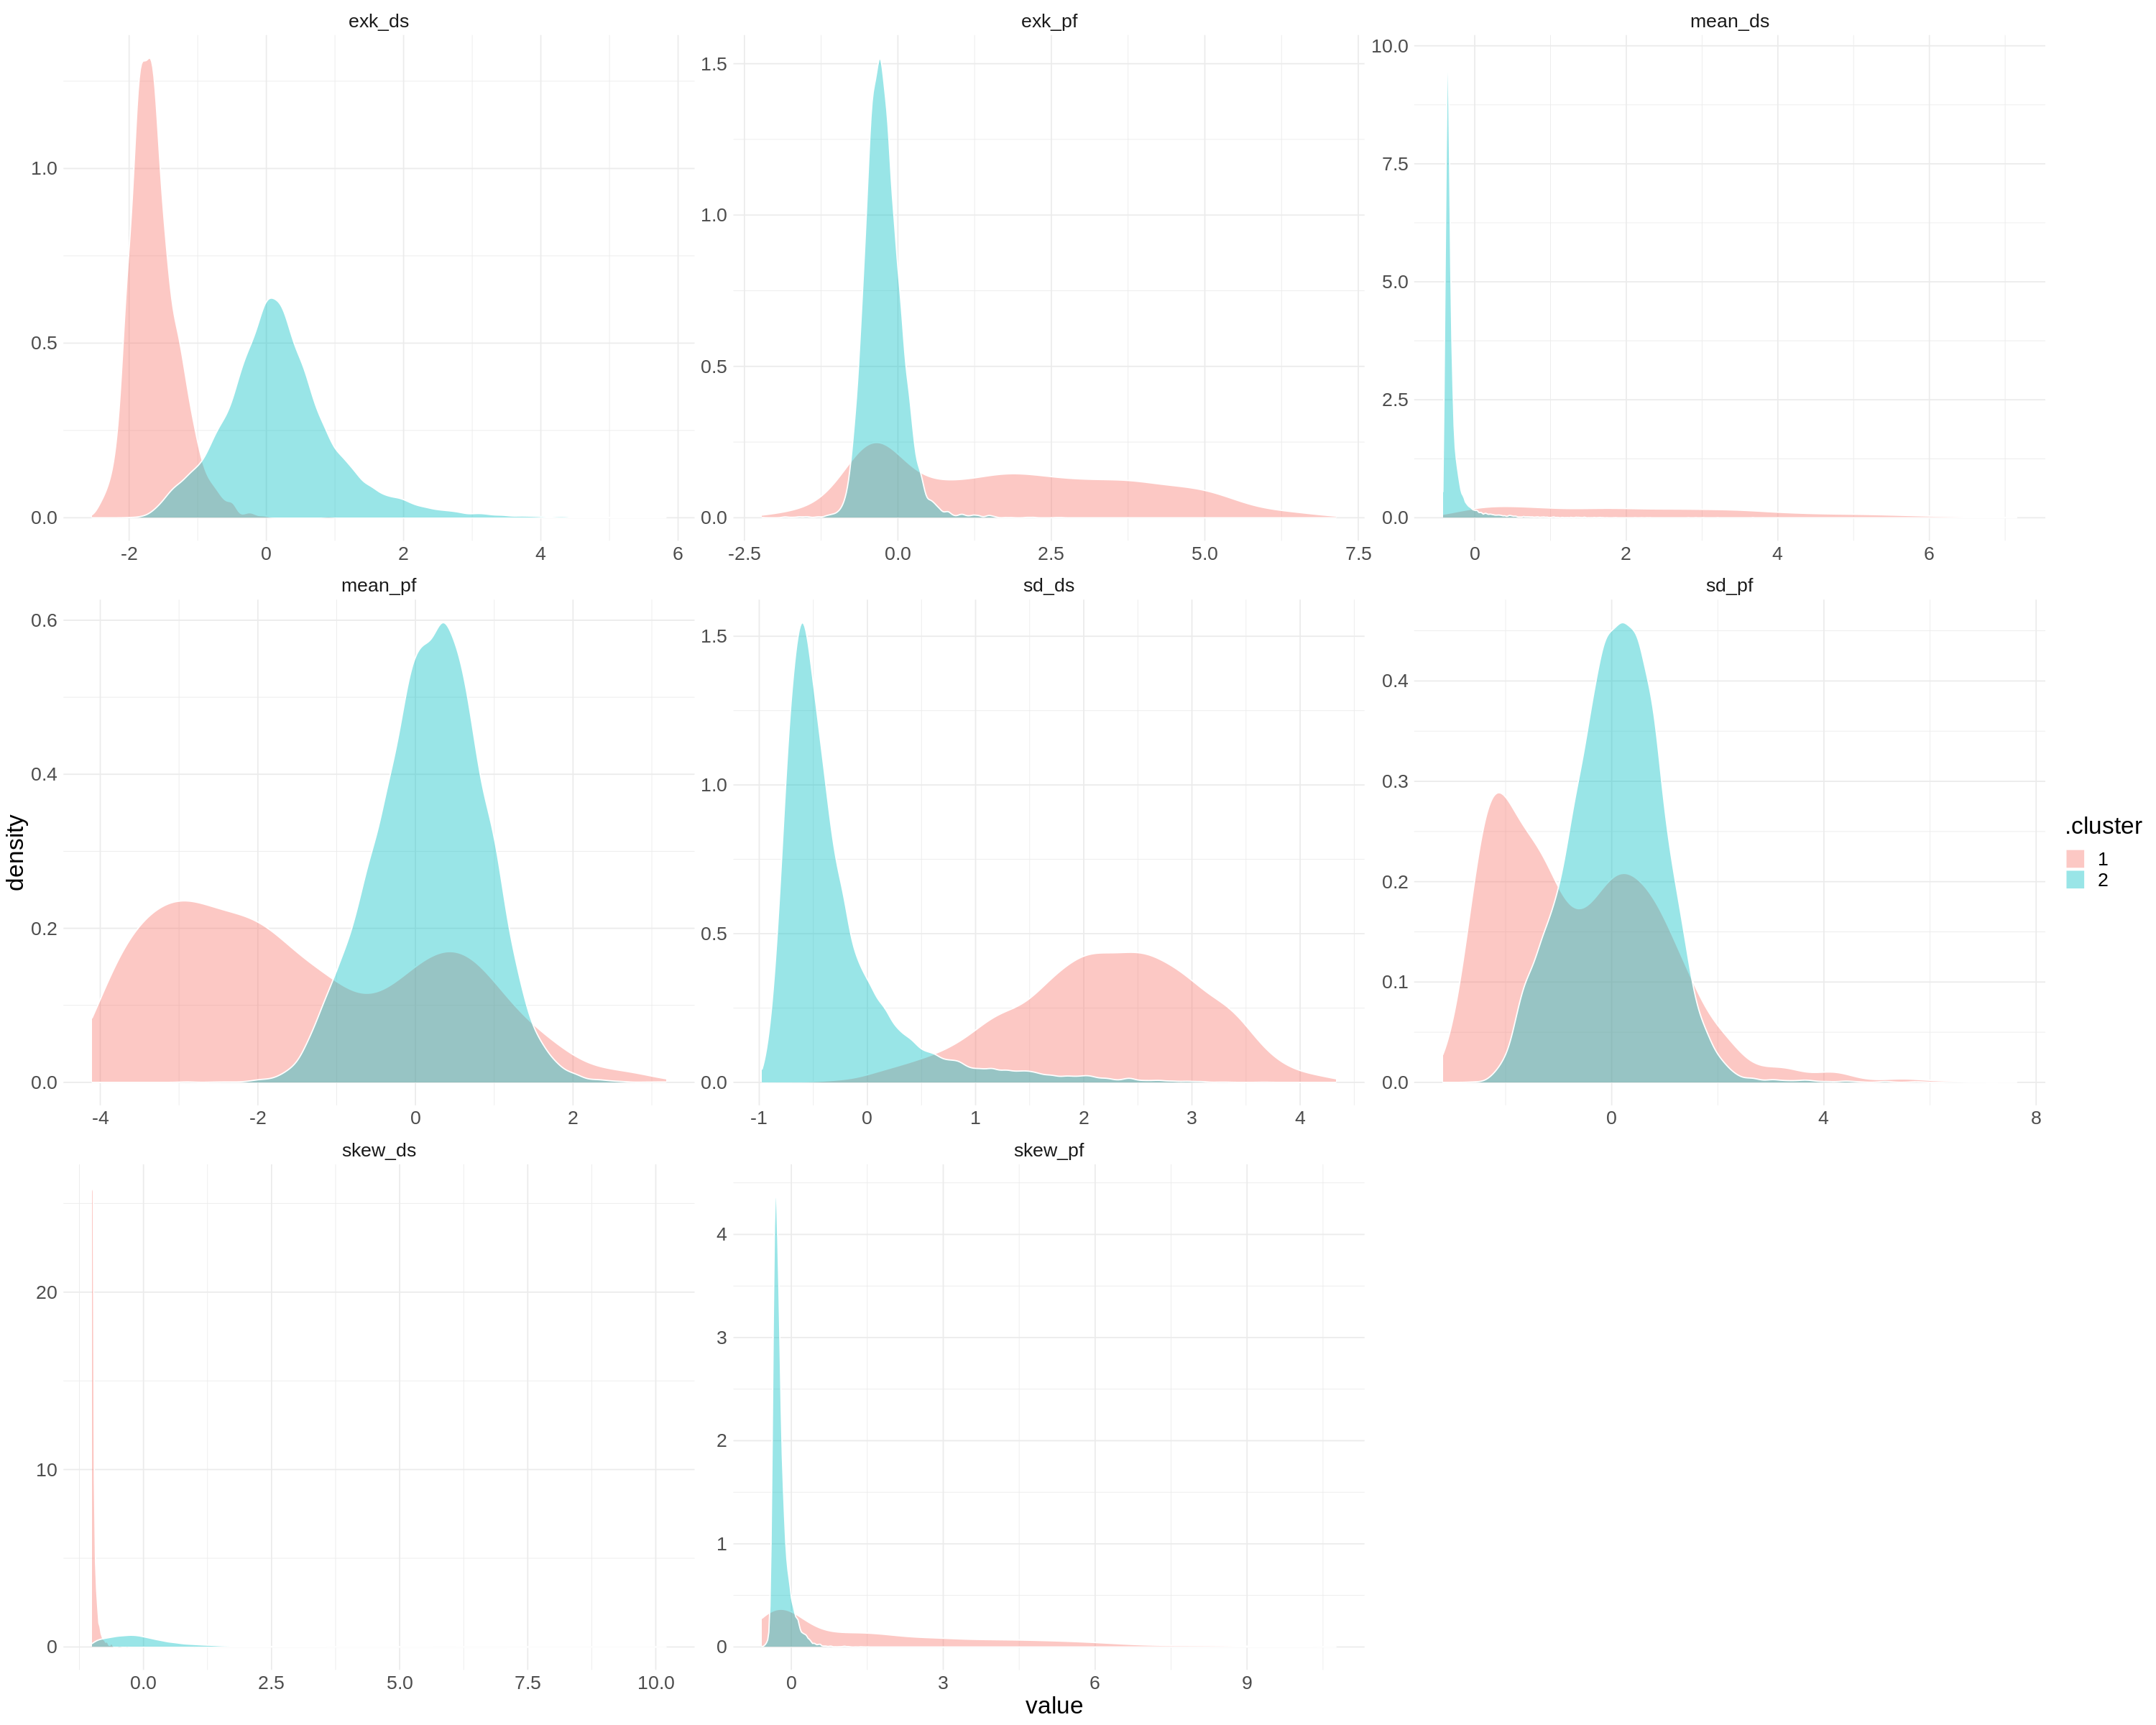

In [84]:
options(repr.plot.height = 20, repr.plot.width = 25)
HTRU_cluster_plot<-HTRU_cluster |>
    pivot_longer(cols = -.cluster, names_to = 'category', values_to = 'value')  |> 
    ggplot(aes(value, fill = .cluster)) +
        geom_density(alpha = 0.4, colour = 'white') +
        facet_wrap(facets = vars(category), scales = 'free') +
        theme_minimal() +
        theme(text = element_text(size = 20))
HTRU_cluster_plot

By plot above, we choose the predictors:???????

In [ ]:
### Prediction model by 

# Discussion

# Reference